In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv' ,encoding='ISO-8859-1')

<ipython-input-5-34f6f0536594>:1: DtypeWarning: Columns (4,31,33,60,61,62,76,79,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/globalterrorismdb_0718dist.csv' ,encoding='ISO-8859-1')


In [6]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [9]:
df.shape

(25487, 135)

In [25]:
pd.set_option('display.max_columns',None)

In [27]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN

In [31]:
col = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region',
       'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
       'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'}
df.rename(columns=col,inplace=True)

In [32]:
df = df[['Year','Month','Day','Country','State','Region','city','latitude',
         'longitude','AttackType','Killed','Wounded','Target','Summary','Group',
         'Target_type','Weapon_type','Motive']]

In [33]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            109
Region             0
city               0
latitude        1262
longitude       1262
AttackType         0
Killed          4968
Wounded         6641
Target           296
Summary        24455
Group              1
Target_type        0
Weapon_type        1
Motive         24725
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25487 entries, 0 to 25486
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         25487 non-null  int64  
 1   Month        25487 non-null  int64  
 2   Day          25487 non-null  int64  
 3   Country      25487 non-null  object 
 4   State        25378 non-null  object 
 5   Region       25487 non-null  object 
 6   city         25487 non-null  object 
 7   latitude     24225 non-null  float64
 8   longitude    24225 non-null  float64
 9   AttackType   25487 non-null  object 
 10  Killed       20519 non-null  float64
 11  Wounded      18846 non-null  float64
 12  Target       25191 non-null  object 
 13  Summary      1032 non-null   object 
 14  Group        25486 non-null  object 
 15  Target_type  25487 non-null  object 
 16  Weapon_type  25486 non-null  object 
 17  Motive       762 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usa

In [42]:
print('Country with most attacks:', df['Country'].value_counts().idxmax())
print('Region with most attacks:', df['Region'].value_counts().idxmax())
print('City with most attacks:', df['city'].value_counts().index[1])
print('Year with most attacks:', df['Year'].value_counts().idxmax())
print('Month with most attacks:', df['Month'].value_counts().idxmax())
print('Group with most attacks:', df['Group'].value_counts().idxmax())
print("Most Attack Types:", df['AttackType'].value_counts().idxmax())

Country with most attacks: El Salvador
Region with most attacks: Western Europe
City with most attacks: Belfast
Year with most attacks: 1984
Month with most attacks: 5
Group with most attacks: Unknown
Most Attack Types: Bombing/Explosion


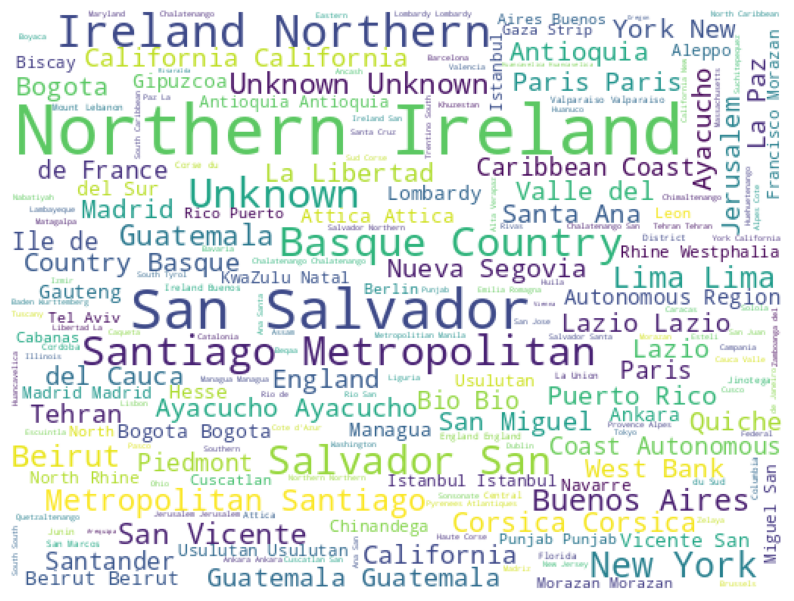

In [51]:
from wordcloud import WordCloud
from scipy import signal

cities = df.State.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)

In [53]:
df['Year'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2662
1981    2586
1982    2544
1983    2870
1984    3495
1985    1415
1986       1
Name: Year, dtype: int64

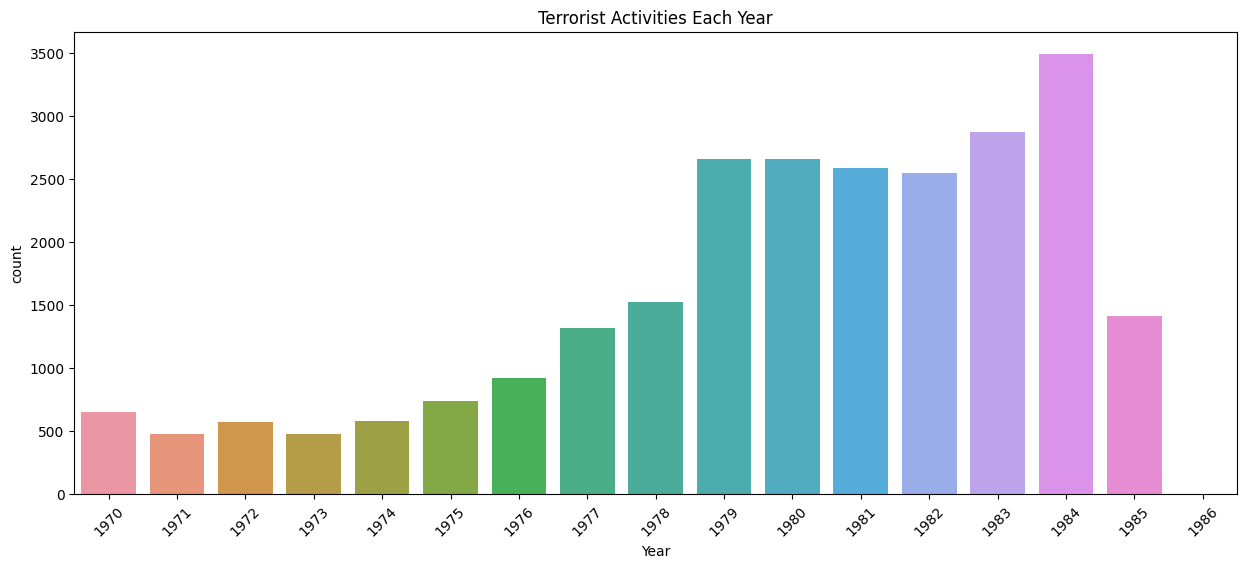

In [60]:
plt.subplots(figsize=(15,6))
sns.countplot(data=df,x='Year')
plt.xticks(rotation=45)
plt.title('Terrorist Activities Each Year')
plt.show()

Text(0, 0.5, 'Number of Attacks')

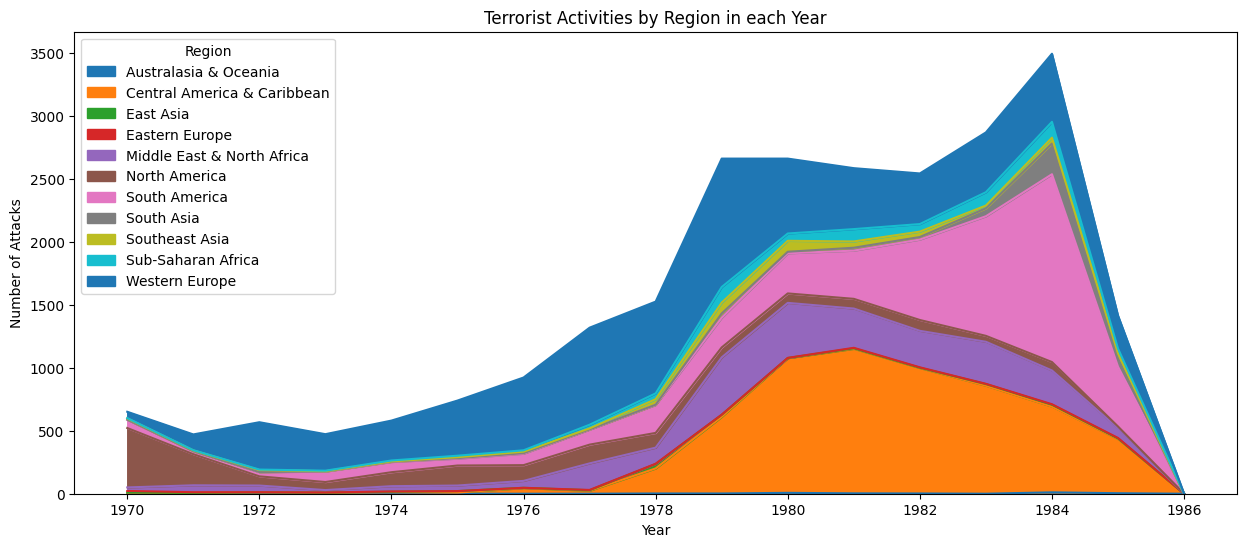

In [62]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')

In [63]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)

df['Casualities'] = df['Wounded'] + df['Killed']

In [64]:
df_2 = df.sort_values(by='Casualities', ascending=False)[:40]

In [65]:
heat = df_2.pivot_table(index='Country',columns='Year',values='Casualities')
heat.fillna(0,inplace=True)

In [66]:
heat.head()

Year,1972,1973,1976,1978,1980,1981,1982,1983,1984,1985
Country,,,,,,,,,,
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,396.0,0.0,0.0
El Salvador,0.0,0.0,0.0,0.0,220.0,0.0,0.0,180.0,136.0,0.0
Ethiopia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,0.0
Guatemala,0.0,0.0,0.0,0.0,0.0,0.0,135.0,0.0,0.0,0.0
Iran,0.0,0.0,0.0,422.0,0.0,0.0,760.0,0.0,318.0,0.0


In [74]:
df.Country.value_counts()[:15]

El Salvador       3280
United Kingdom    2374
Peru              1896
United States     1813
Spain             1674
Colombia          1606
Guatemala         1376
Italy             1249
Nicaragua         1139
France            1030
Chile              908
Lebanon            849
Turkey             616
Israel             441
Argentina          428
Name: Country, dtype: int64

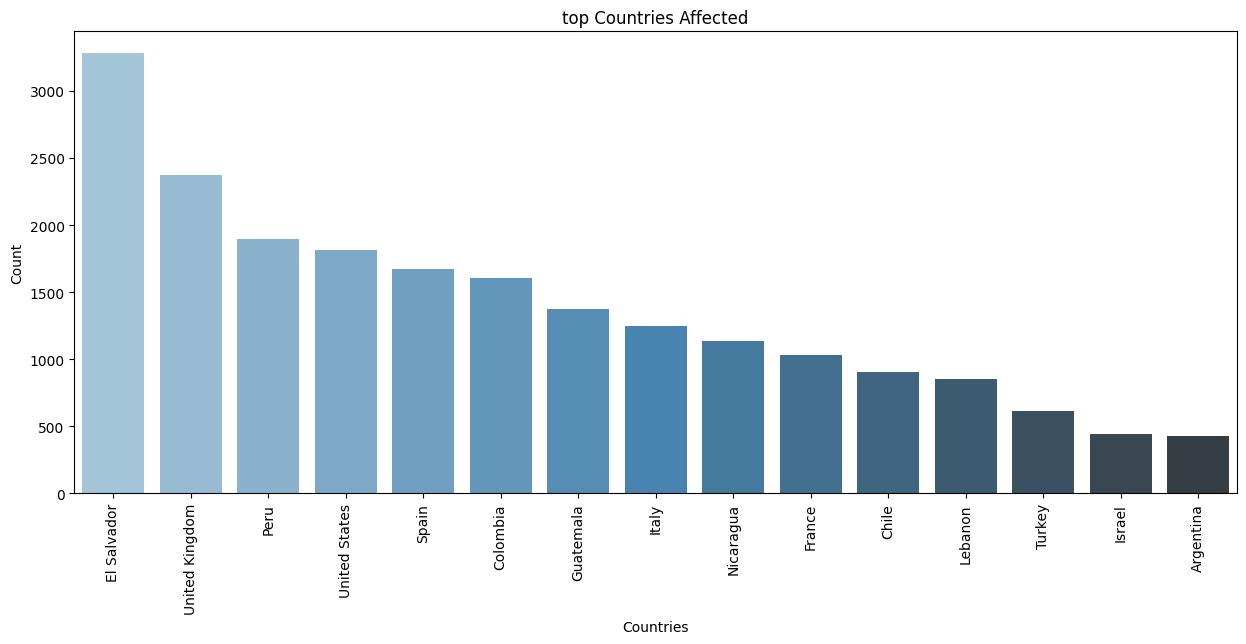

In [84]:
plt.subplots(figsize=(15,6))
sns.barplot(x=df['Country'].value_counts()[:15].index, y=df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [85]:
df.Group.value_counts()[1:15]

Irish Republican Army (IRA)                         1561
Shining Path (SL)                                   1505
Farabundo Marti National Liberation Front (FMLN)    1447
Basque Fatherland and Freedom (ETA)                  988
Nicaraguan Democratic Force (FDN)                    526
Palestinians                                         471
Revolutionary Armed Forces of Colombia (FARC)        423
M-19 (Movement of April 19)                          358
Movement of the Revolutionary Left (MIR) (Chile)     272
Corsican National Liberation Front (FLNC)            265
Protestant extremists                                228
Red Brigades                                         212
African National Congress (South Africa)             202
Sandinista National Liberation Front (FSLN)          197
Name: Group, dtype: int64

In [86]:
df_3 = df[df.Group.isin(['Irish Republican Army (IRA)','Shining Path (SL)','Farabundo Marti National Liberation Front (FMLN)'])]

In [87]:
df_3.Country.unique()

array(['United Kingdom', 'Ireland', 'United States', 'Zaire', 'Portugal',
       'West Germany (FRG)', 'Peru', 'El Salvador', 'Belgium',
       'Netherlands', 'Guatemala', 'Denmark', 'Switzerland', 'Greece',
       'France', 'Honduras', 'Costa Rica', 'Nicaragua', 'Bolivia',
       'Colombia', 'Argentina'], dtype=object)

In [88]:
df_group = df.dropna(subset=['latitude','longitude'])
df_group = df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = df.Group.value_counts()[1:8].index.tolist()
df_3 = df_3.loc[df_3.Group.isin(terrorist_groups)]
print(df_3.Group.unique())

['Irish Republican Army (IRA)' 'Shining Path (SL)'
 'Farabundo Marti National Liberation Front (FMLN)']


In [89]:
df.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [91]:
diedCount = df.loc[:,'Killed']
print('Number of people died in terrorist attacks:', int(sum(diedCount.dropna())))

Number of people died in terrorist attacks: 44654


In [94]:
attackData = df.loc[:,'AttackType']
attackTypeKillData = pd.concat([attackData, diedCount], axis=1)

In [95]:
attackTypeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [96]:
killedByAttackType = attackTypeKillData.pivot_table(columns='AttackType',values='Killed',aggfunc='sum')
killedByAttackType

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,26139,5005,8921,754,215,449,481,19,2671


In [97]:
killedByAttackType.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


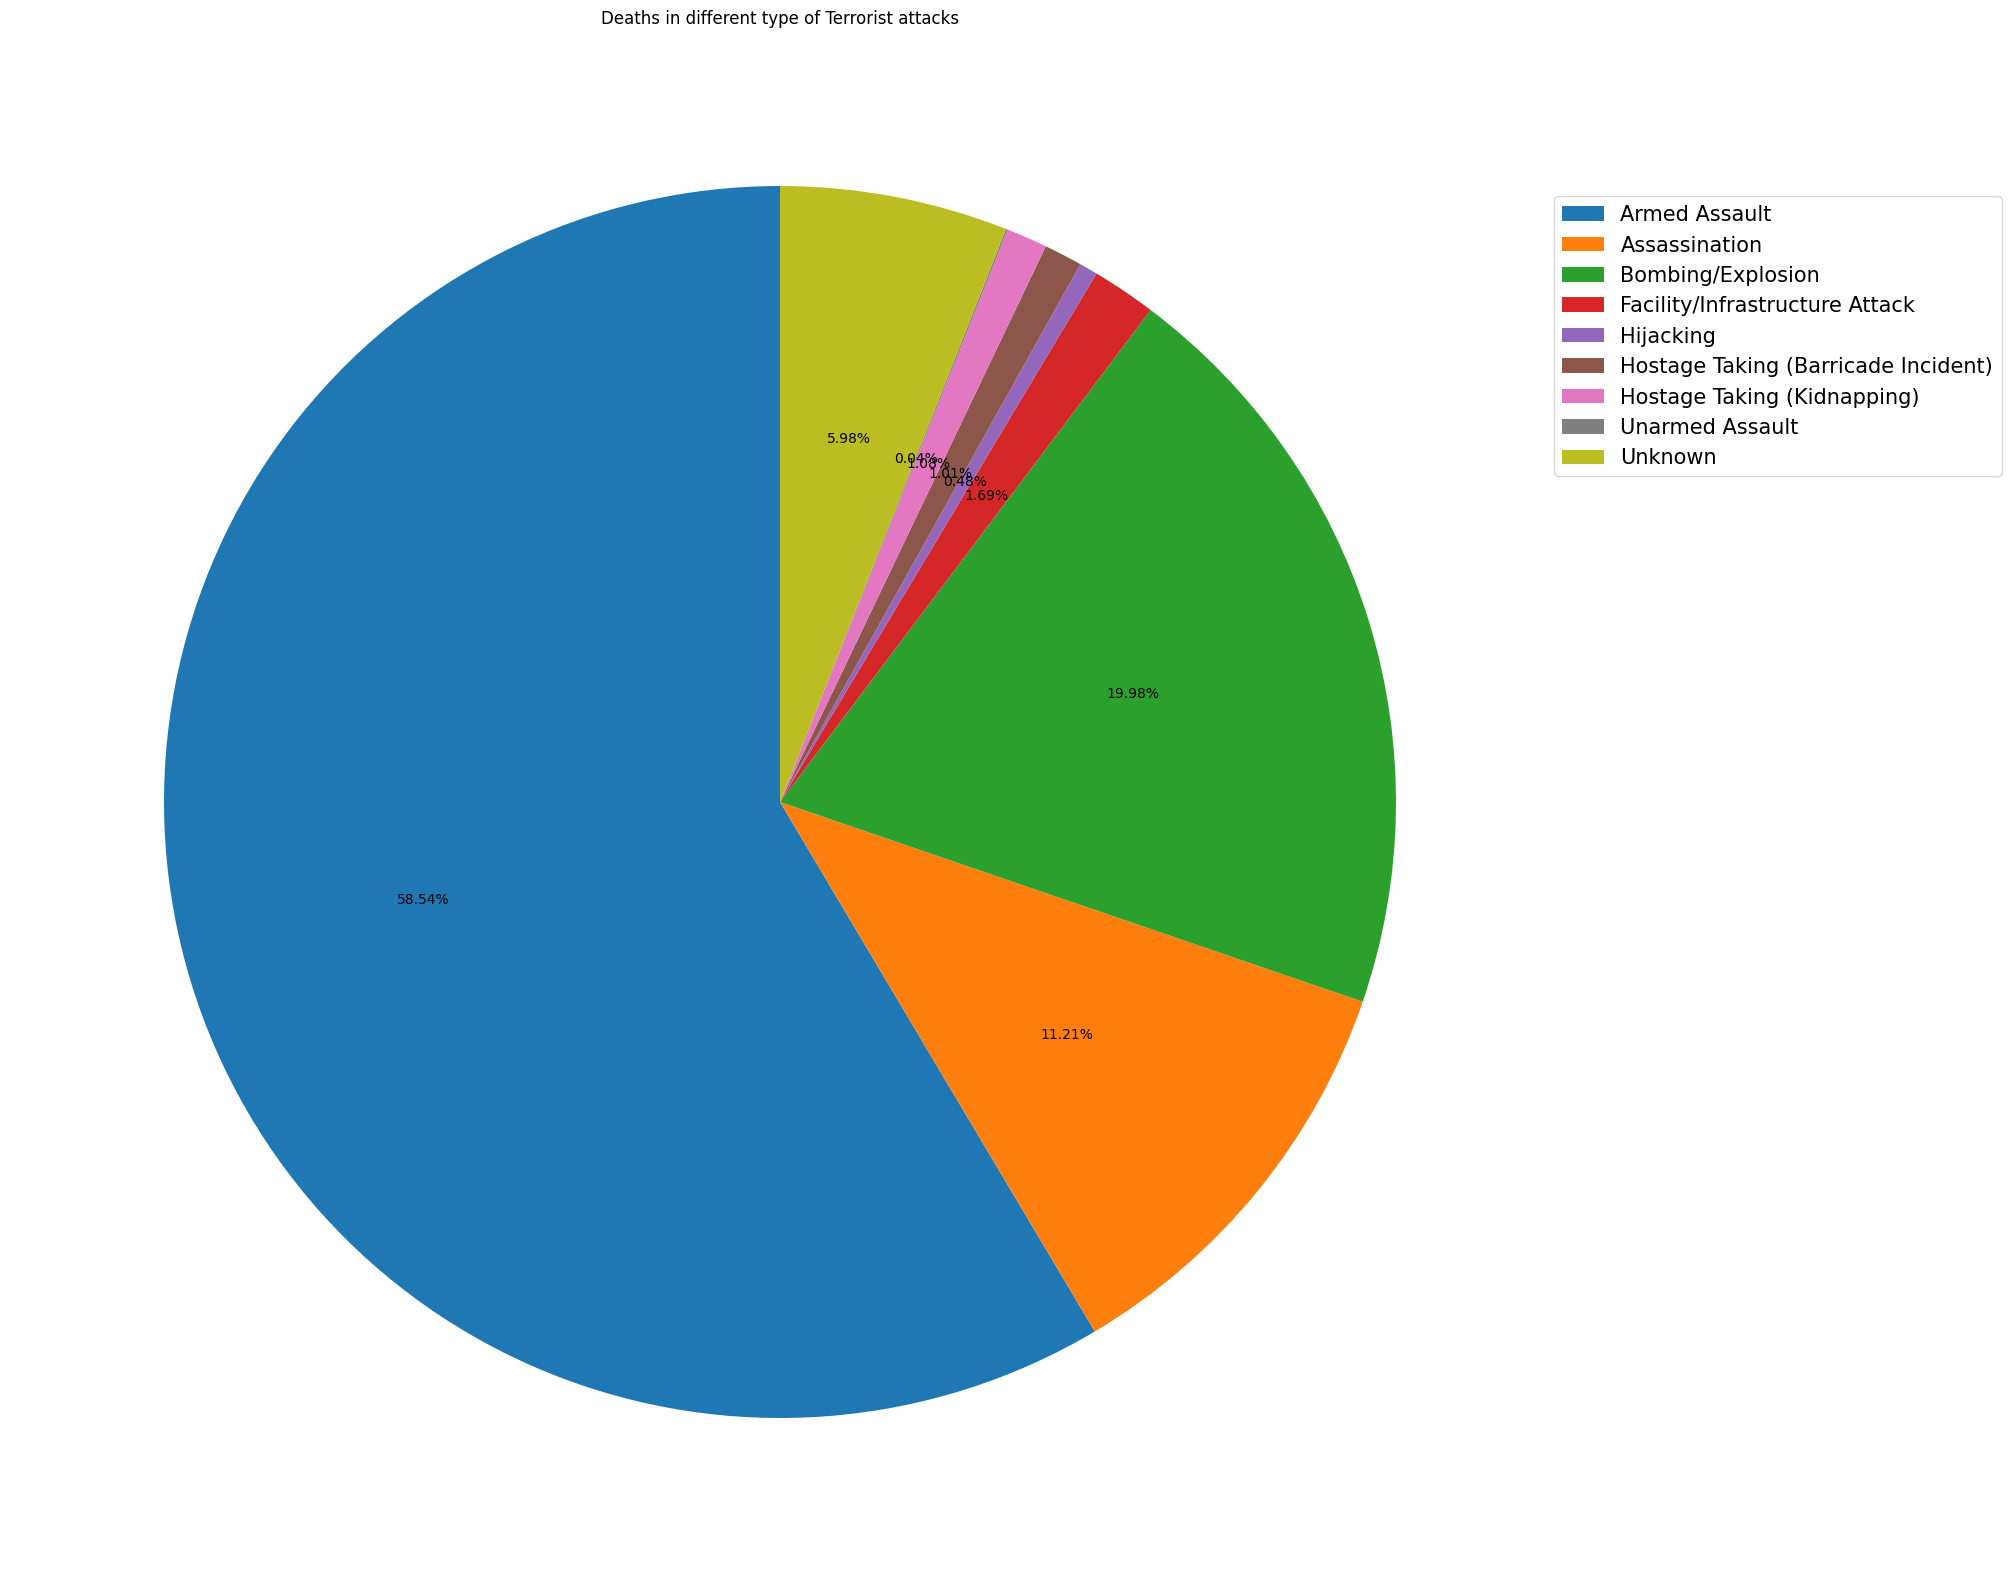

In [136]:
labels = list(killedByAttackType.columns)
transpose = killedByAttackType.T
value = transpose.values.tolist()
values = []
for x in value:
  values.append(int(str(x).strip('[]')))
fig, ax = plt.subplots(figsize=(20,20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Deaths in different type of Terrorist attacks')
plt.legend(labels,loc='upper right',bbox_to_anchor = (1.3,0.9),fontsize=15)
plt.show()

In [138]:
countryData = df.loc[:, 'Country']
countryKillData = pd.concat([countryData, diedCount],axis=1)



In [139]:
countryKillFormatData = countryKillData.pivot_table(columns='Country',values='Killed',aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,Barbados,Belgium,Belize,Bolivia,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Canada,Central African Republic,Chad,Chile,Colombia,Costa Rica,Cyprus,Czechoslovakia,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),Ecuador,Egypt,El Salvador,Ethiopia,Falkland Islands,France,French Guiana,Gabon,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guyana,Haiti,Honduras,Hong Kong,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kenya,Kuwait,Lebanon,Lesotho,Libya,Luxembourg,Malaysia,Malta,Martinique,Mauritania,Mexico,Morocco,Mozambique,Myanmar,Namibia,Netherlands,New Caledonia,New Hebrides,New Zealand,Nicaragua,Niger,Nigeria,North Yemen,Norway,Pakistan,Panama,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Qatar,Rhodesia,Romania,Saudi Arabia,Senegal,Seychelles,Singapore,Somalia,South Africa,South Korea,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Trinidad and Tobago,Tunisia,Turkey,Uganda,United Arab Emirates,United Kingdom,United States,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,53,0,0,0,486,331,6,14,0,0,13,73,14,0,13,1,55,0,2,1,4,5,3,0,93,2349,11,29,26,0,5,3,11,1,13,73,9299,335,0,145,1,2,136,9,7,4390,1,8,5,123,0,0,419,14,995,118,93,308,368,20,13,14,46,8,1824,41,15,0,105,1,0,4,101,10,121,116,74,20,11,0,1,8450,3,4,3,0,63,2,6,15,5019,1325,0,25,1,217,3,6,0,0,0,1,120,3,81,0,4,643,891,310,0,1,7,50,467,25,1,191,0,41,363,458,121,2220,228,4,0,46,69,76,0,6,3,5,68


In [140]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 25
fig_size[1] = 25
plt.rcParams["figure.figsize"] = fig_size

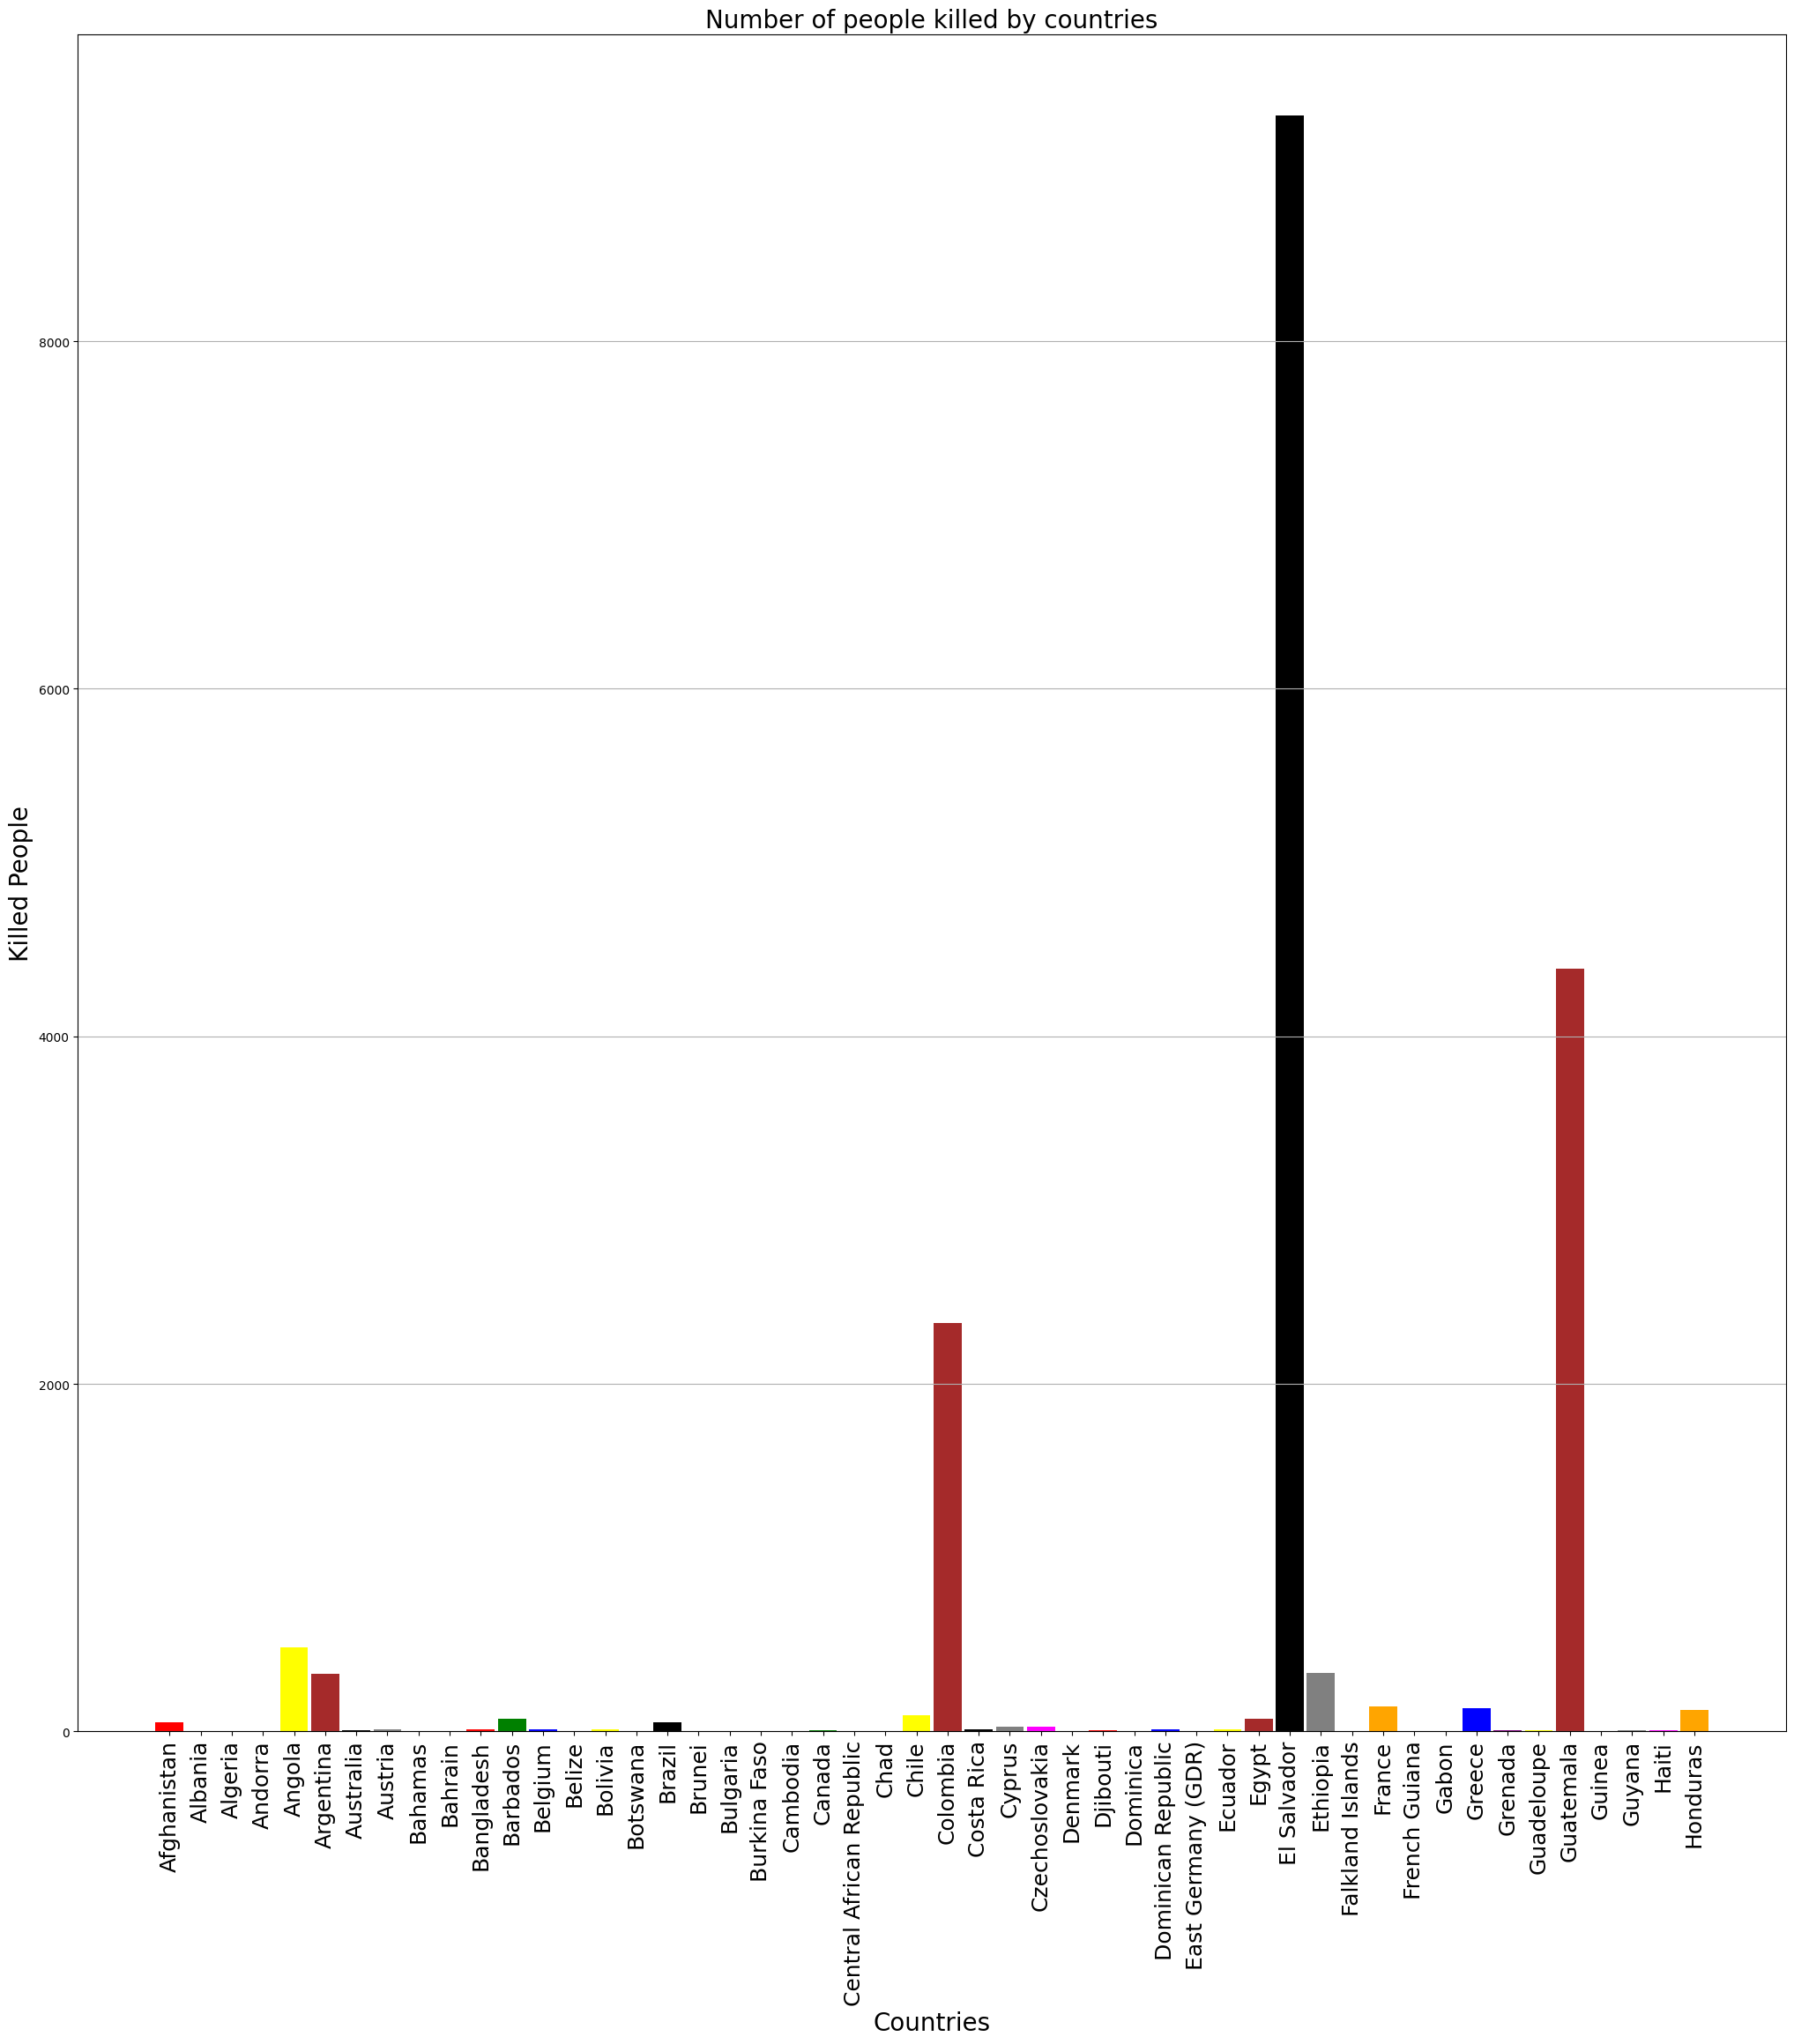

In [141]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

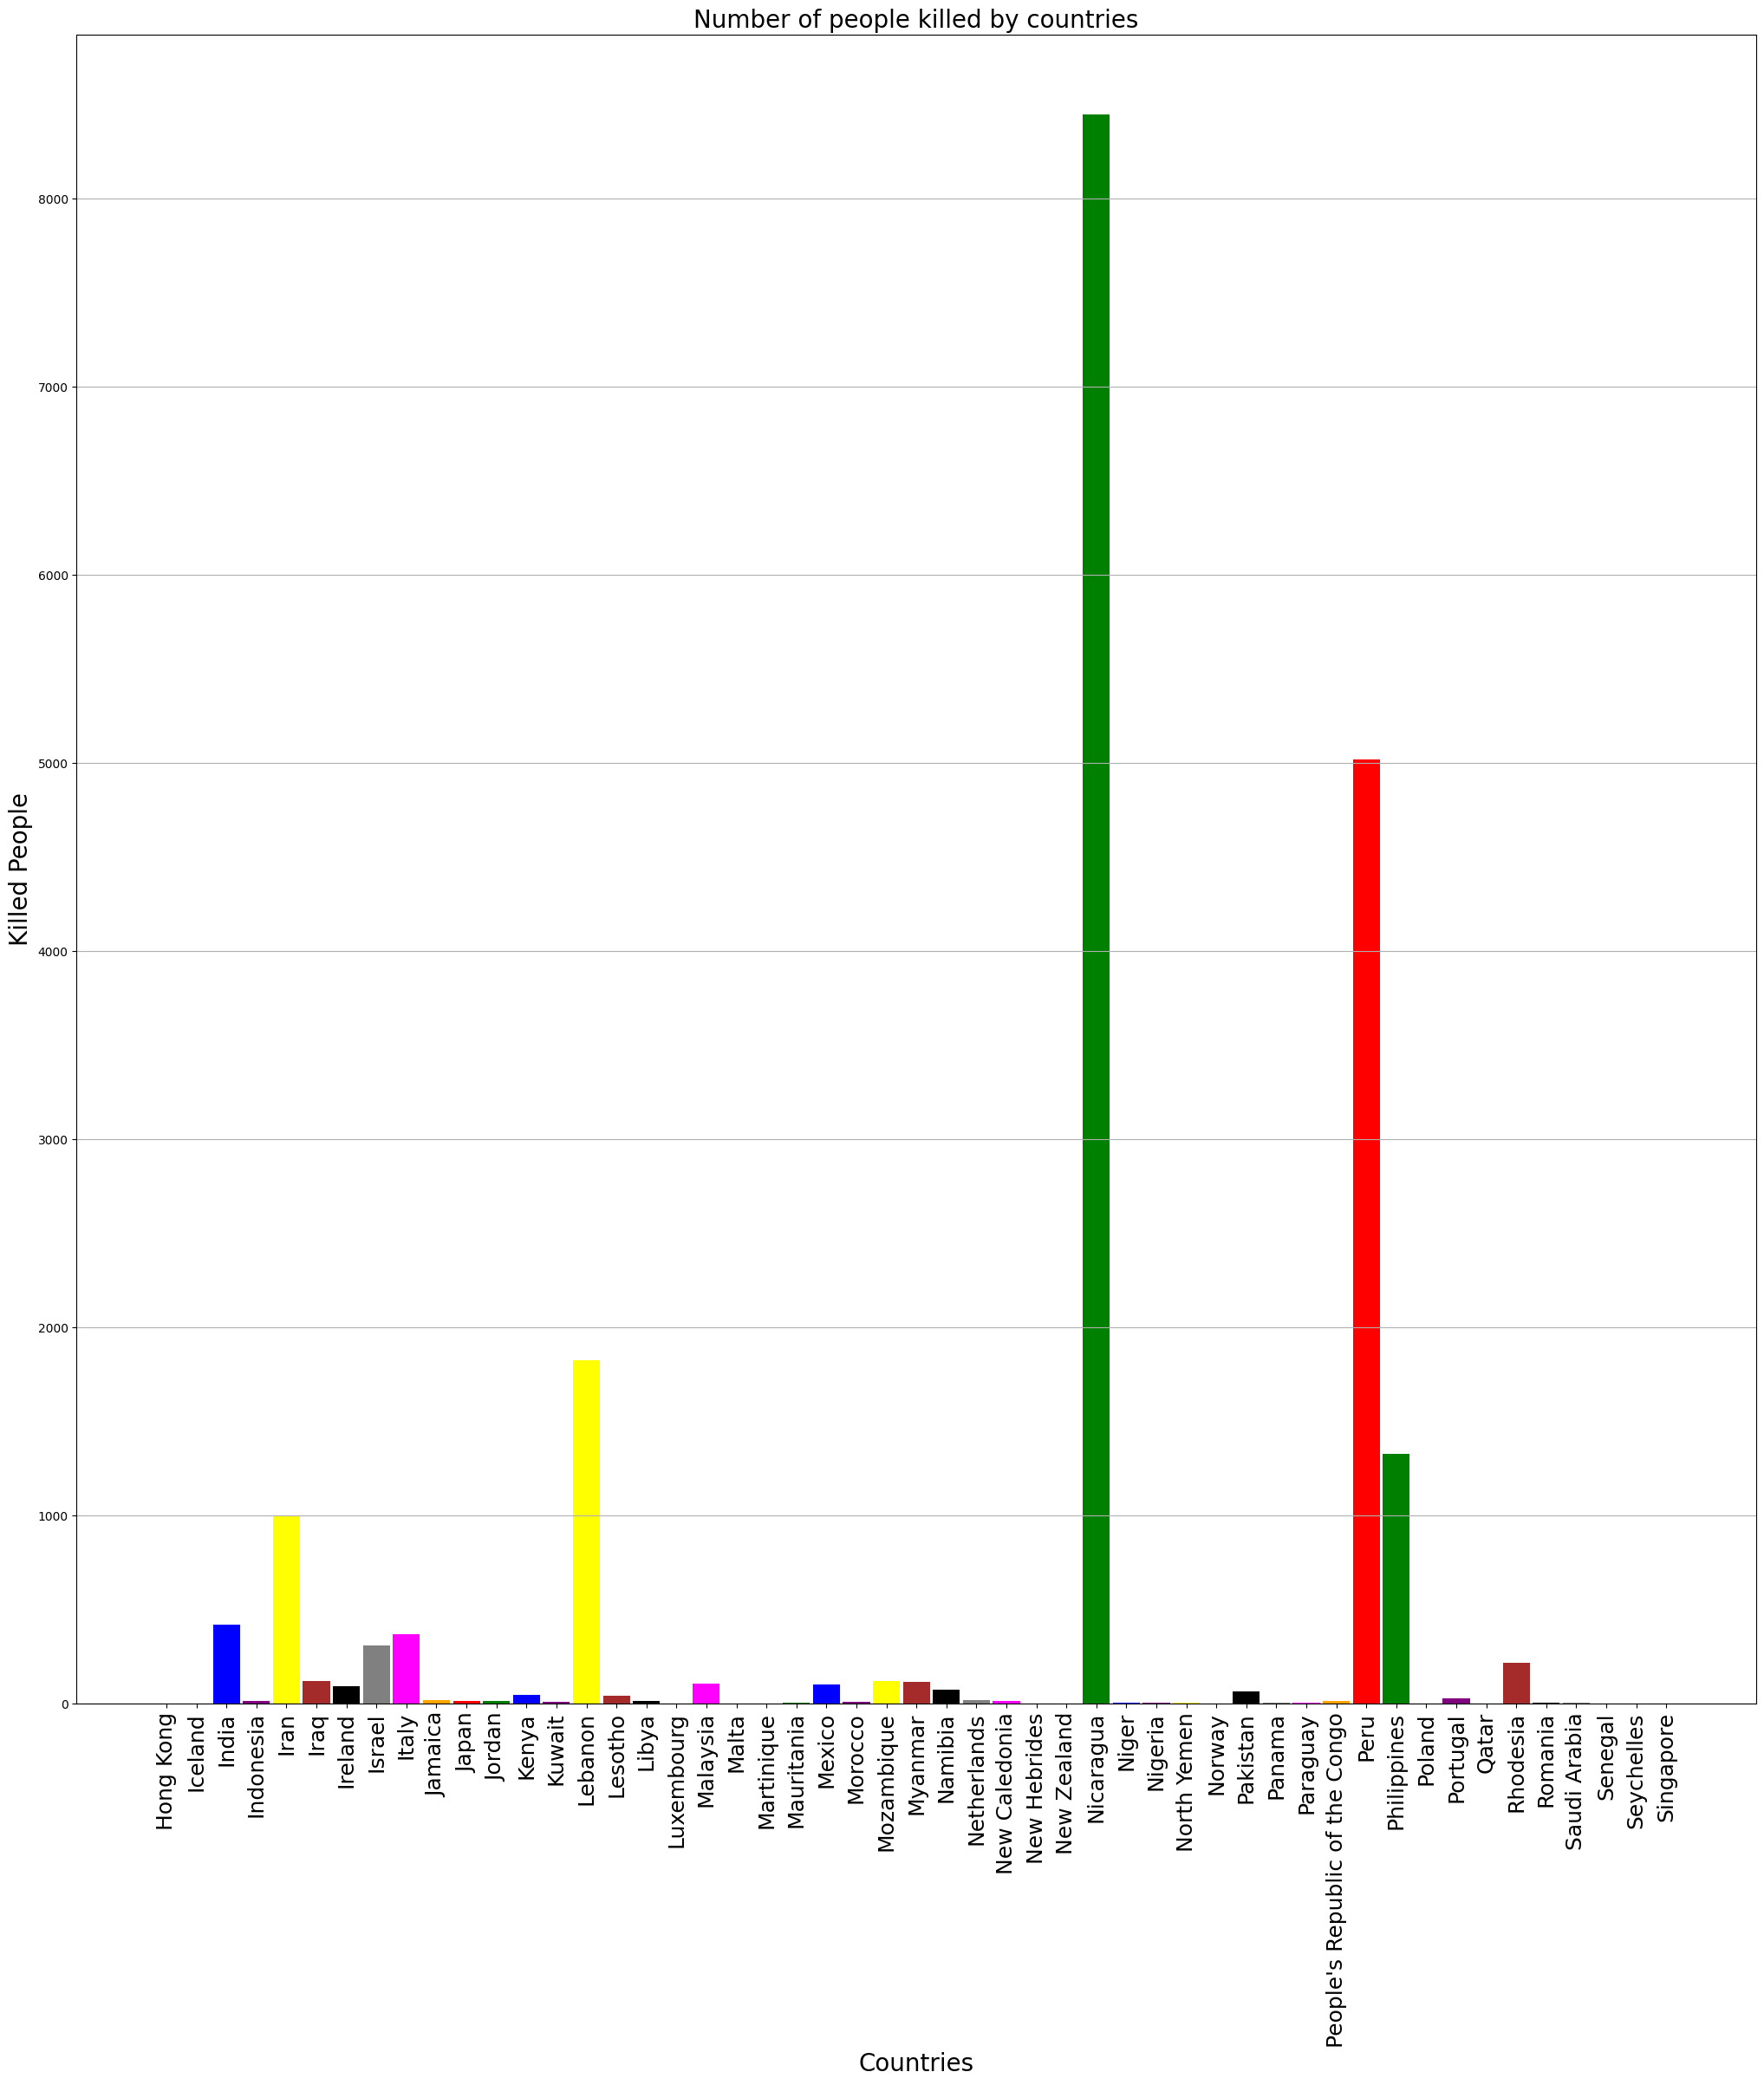

In [142]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

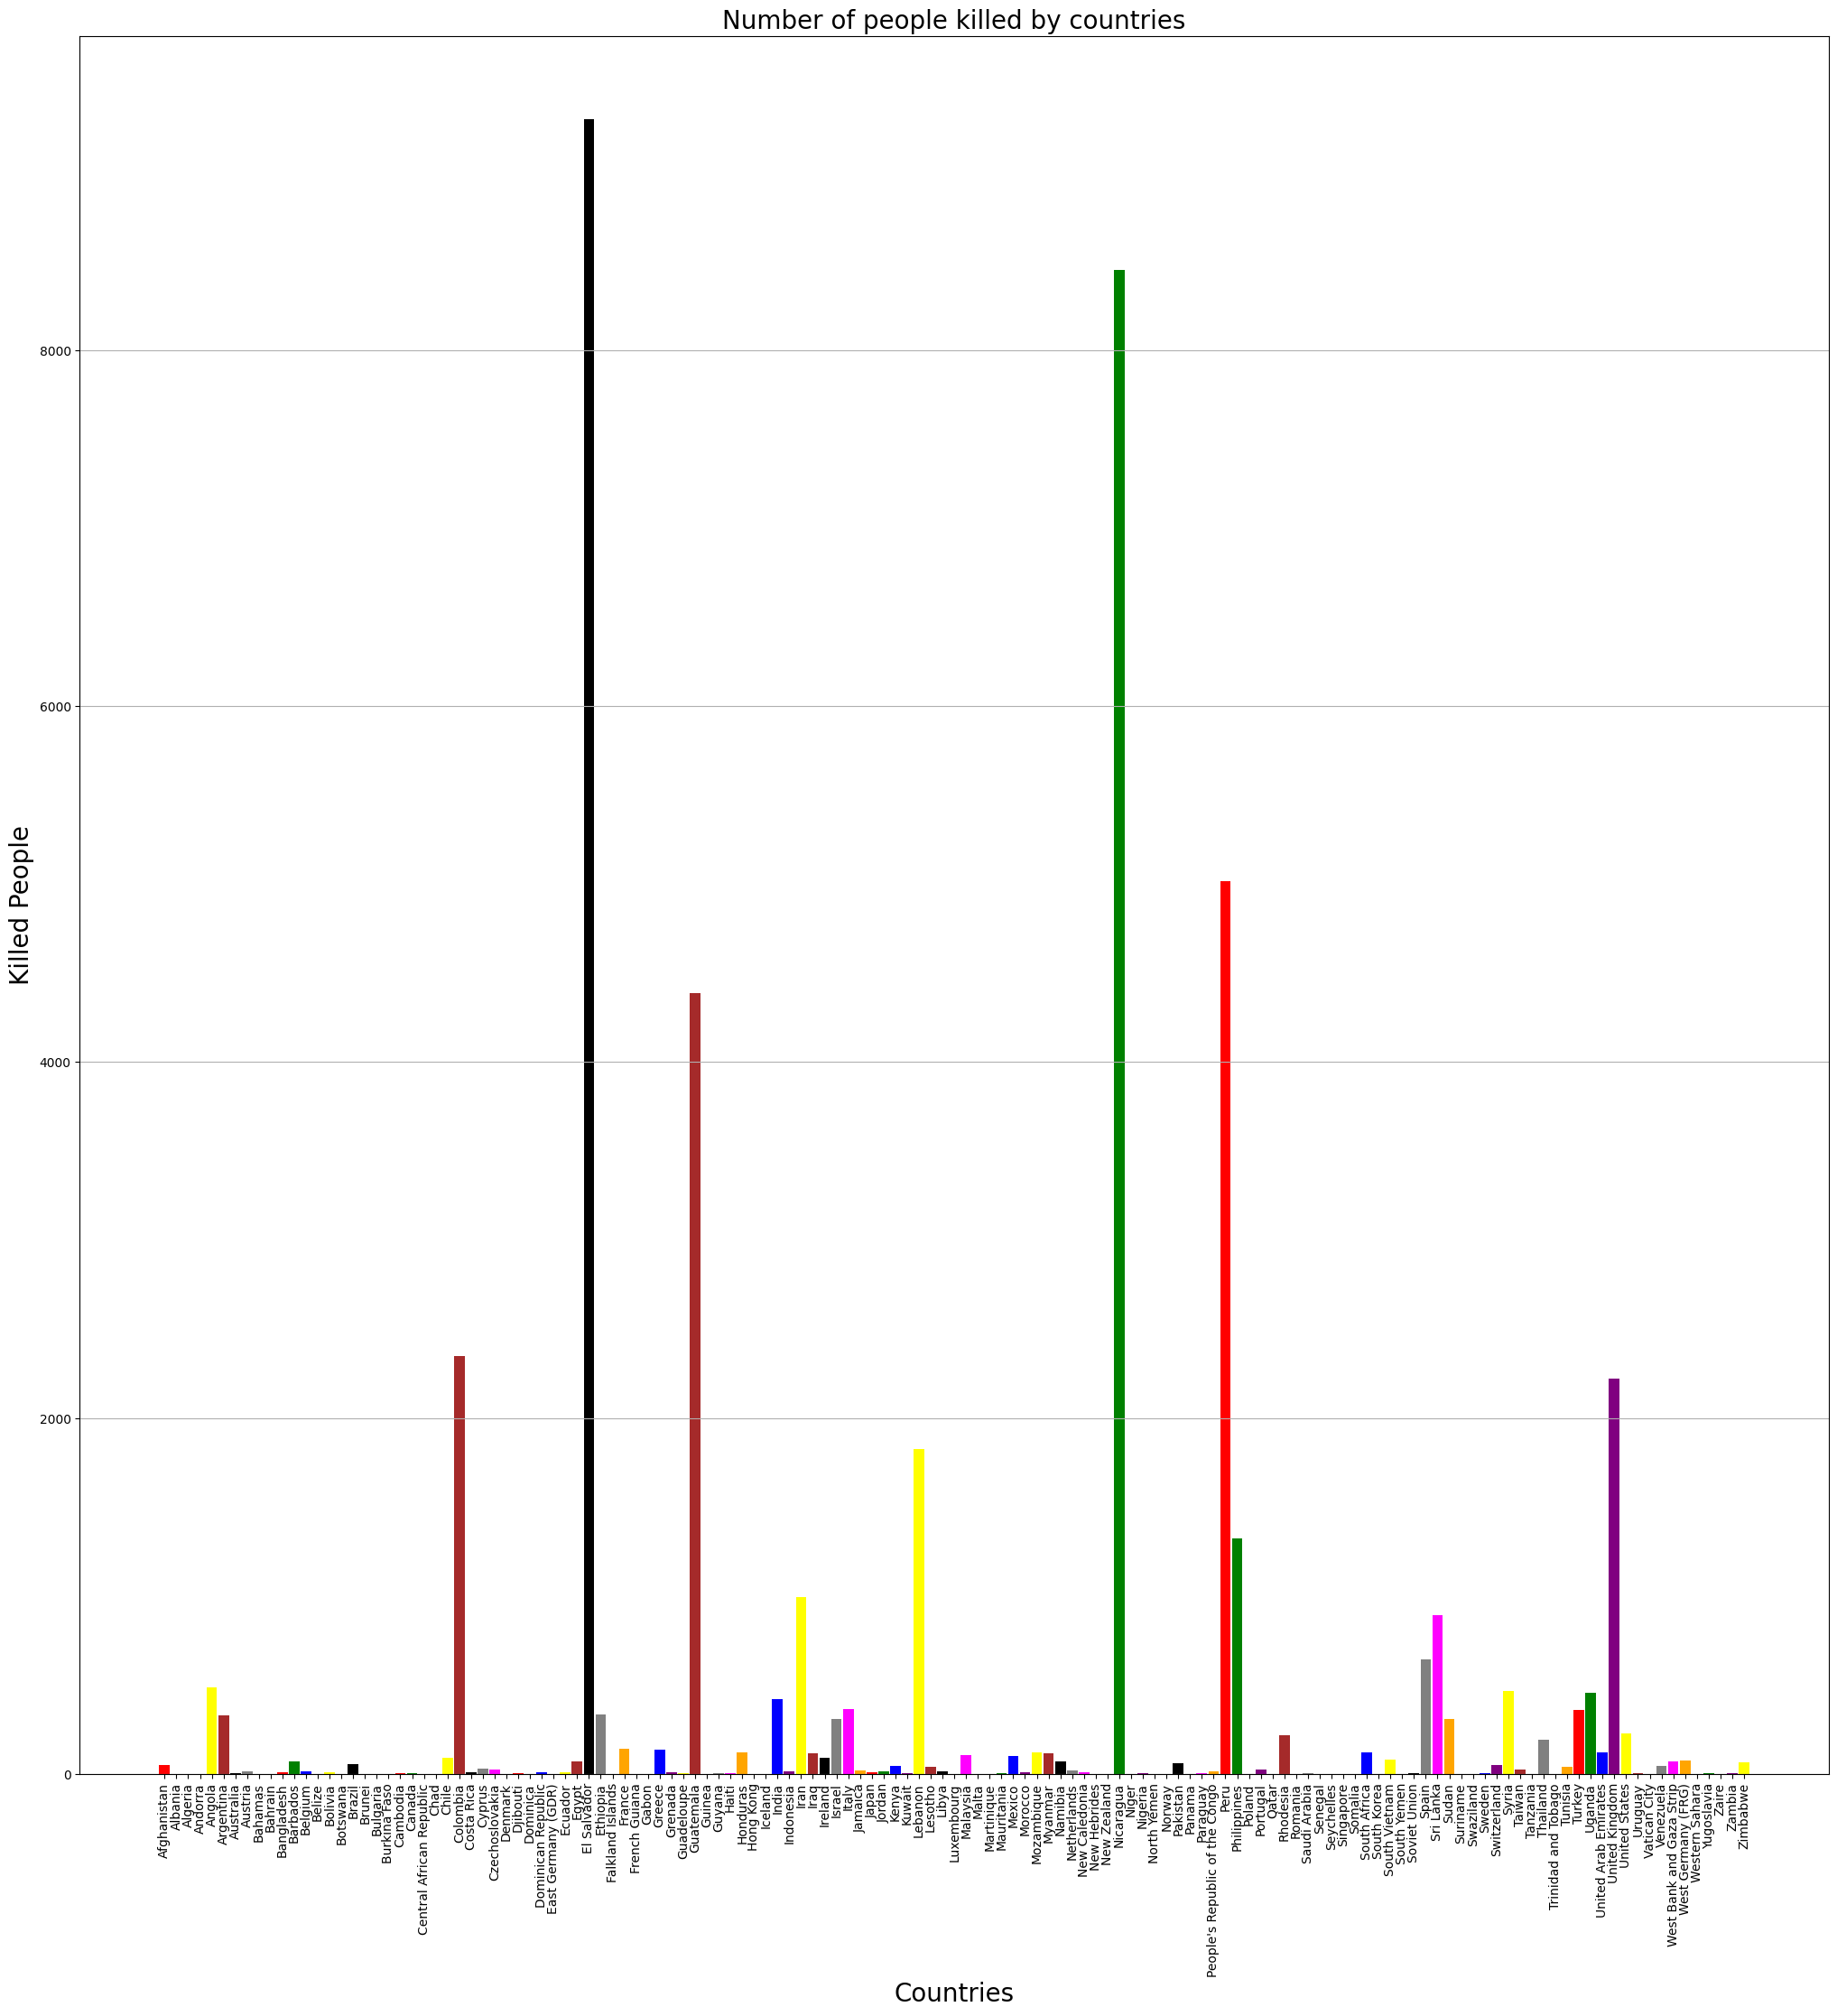

In [167]:
labels = countryKillFormatData.columns.tolist()
# labels = labels[152:206]
index = np.arange(len(labels))

transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
# values = values[152:206]
values = [int(i[0]) for i in values]

colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=10, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()